In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
from nn_momentum2 import sigmoid, sigmoidPrime, feedforward, backpropagation, loss, model
from random import randint
import pickle
import time
from matplotlib import pyplot

def load_model(name):
    f = open("save weights/momentum/"+name, 'rb')
    return pickle.load(f)
    
def save_model(name, w):
    f = open("save weights/momentum/"+name, 'wb')
    pickle.dump(w, f)

In [17]:
f = open('data.txt', 'r')

data_x = []
data_y = []

for i, tt in enumerate(f):
    if(i>0):
        tmp = tt.split()
        if(i==1):
            prev = [float(tmp[0]), float(tmp[1])] 
        data_x.append([float(tmp[2]), float(tmp[3]), float(tmp[4]), prev[0], prev[1]])
        data_y.append([float(tmp[0]), float(tmp[1])])
        prev = data_y[-1]         

def normalize(t, max_, min_):
    return (t - min_) / (max_ - min_)

train_x = np.array(data_x, dtype=float)
train_y = np.array(data_y, dtype=float) + 0.4
max1, max2, max3, max4, max5 = max(train_x[:, 0]), max(train_x[:, 1]), max(train_x[:, 2]), max(train_x[:, 3]), max(train_x[:, 4])
min1, min2, min3, min4, min5 = min(train_x[:, 0]), min(train_x[:, 1]), min(train_x[:, 2]), min(train_x[:, 3]), min(train_x[:, 4])

train_x[:, 0] = normalize(train_x[:, 0], max1+0.6, min1-0.6)
train_x[:, 1] = normalize(train_x[:, 1], max2+0.6, min2-0.6)
train_x[:, 2] = normalize(train_x[:, 2], max3+0.6, min3-0.6)
train_x[:, 3] = normalize(train_x[:, 3], max4+0.02, min4-0.02)
train_x[:, 4] = normalize(train_x[:, 4], max5+0.02, min5-0.02)

print(max(train_x[:, 0]), max(train_x[:, 1]), max(train_x[:, 2]), max(train_x[:, 3]), max(train_x[:, 4]))
print(min(train_x[:, 0]), min(train_x[:, 1]), min(train_x[:, 2]), min(train_x[:, 3]), min(train_x[:, 4]))

0.885673803352 0.886284509335 0.898647912476 0.893253059634 0.893253059634
0.114326196648 0.113715490665 0.101352087524 0.106746940366 0.106746940366


In [22]:
start = time.time()
in_dim = train_x.shape[1]
out_dim = train_y.shape[1]
layer = [in_dim, 100, 20, 10, 10, out_dim]
learning_rate = 0.0001
alpha = 0.8
l2_lambda = 0
batch_size = 4999
num_batch = int(train_x.shape[0]/ batch_size)

np.random.seed(0)
weights, bias = model(layer)
for i in range(500000+1):
    for rr in range(num_batch):
        input_x = train_x[batch_size*rr:batch_size*(rr+1)]
        input_y = train_y[batch_size*rr:batch_size*(rr+1)]
        aa = feedforward(input_x, weights, bias)
        
        if(i==0):
            vw_old = [0 for i in range(len(weights))]
            vb_old = [0 for i in range(len(bias))]
            
        weights, bias, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights, bias, alpha=alpha, learning_rate=learning_rate, l2_lambda=l2_lambda)

    if(i%1000==0):
        aa = feedforward(train_x, weights, bias)
        yd = aa[-1]
        lo = loss(train_y, yd)
        print(i, lo)
        save_model('10', [weights, bias])   
        
save_model('10', [weights, bias])   
print('Time:', time.time()-start)

0 0.21501341293
1000 0.00213584008696
2000 0.000109807922444
3000 0.000106480927043
4000 0.00010548274064
5000 0.000104834919716
6000 0.000104260800513
7000 0.000103658373717
8000 0.000102979950947
9000 0.000102193635044
10000 0.00010126952541
11000 0.000100174074298


KeyboardInterrupt: 

In [37]:
start = time.time()

for i in range(10000+1):
    for rr in range(num_batch):
        input_x = train_x[batch_size*rr:batch_size*(rr+1)]
        input_y = train_y[batch_size*rr:batch_size*(rr+1)]
        aa = feedforward(input_x, weights, bias)
        
        if(i==0):
            vw_old = [0 for i in range(len(weights))]
            vb_old = [0 for i in range(len(bias))]
            
        weights, bias, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights, bias, alpha=alpha, learning_rate=learning_rate, l2_lambda=l2_lambda)

    if(i%1000==0):
        aa = feedforward(train_x, weights, bias)
        yd = aa[-1]
        lo = loss(train_y, yd)
        print(i, lo)
        save_model('10', [weights, bias])   
        
save_model('10', [weights, bias])   
print('Time:', time.time()-start)

0 9.85950685122e-05
1000 9.69779264612e-05
2000 9.50228496996e-05
3000 9.26591076935e-05
4000 8.97969039267e-05
5000 8.63319517419e-05
6000 8.21468604998e-05
7000 7.71142279078e-05
8000 7.11020015865e-05
9000 6.39861914638e-05
10000 5.56901933293e-05
Time: 197.85536003112793


In [40]:
start = time.time()

for i in range(10000+1):
    for rr in range(num_batch):
        input_x = train_x[batch_size*rr:batch_size*(rr+1)]
        input_y = train_y[batch_size*rr:batch_size*(rr+1)]
        aa = feedforward(input_x, weights, bias)
        
        if(i==0):
            vw_old = [0 for i in range(len(weights))]
            vb_old = [0 for i in range(len(bias))]
            
        weights, bias, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights, bias, alpha=alpha, learning_rate=learning_rate, l2_lambda=l2_lambda)

    if(i%1000==0):
        aa = feedforward(train_x, weights, bias)
        yd = aa[-1]
        lo = loss(train_y, yd)
        print(i, lo)
        save_model('10', [weights, bias])   
        
save_model('10', [weights, bias])   
print('Time:', time.time()-start)

0 5.568841641e-05
1000 4.63191447936e-05
2000 3.62325682386e-05
3000 2.6365301253e-05
4000 1.79052763167e-05
5000 1.16636300428e-05
6000 7.62523256891e-06
7000 5.21831911188e-06
8000 3.82773634511e-06
9000 3.0261531031e-06
10000 2.56225074896e-06
Time: 205.855623960495


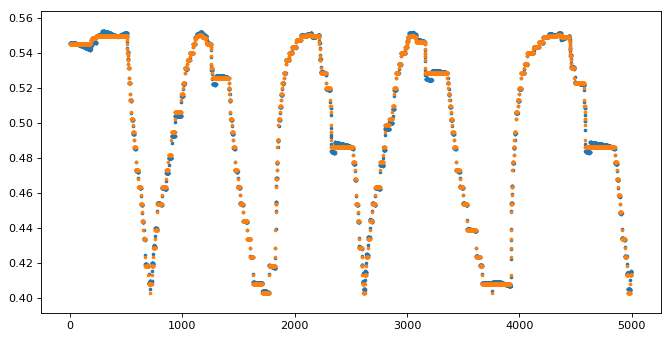

In [41]:
aa = feedforward(train_x, weights, bias)
yd = aa[-1]

from matplotlib import pyplot
num = len(train_x)
time_ = [i for i in range(num)]
fig=pyplot.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.scatter(time_, yd[:, 0], s=5)
pyplot.scatter(time_, train_y[:, 0], s=5)
pyplot.show()

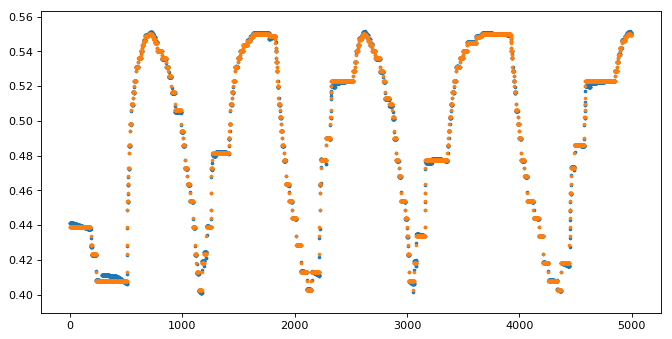

In [42]:
from matplotlib import pyplot
num = len(train_x)
time_ = [i for i in range(num)]
fig=pyplot.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.scatter(time_, yd[:, 1], s=5)
pyplot.scatter(time_, train_y[:, 1], s=5)
pyplot.show()

In [3]:
[weights, bias] = load_model('10')